In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('Analytic_test.xlsx', header=1)

In [3]:
import datetime
for column in df.iloc[:, 2:].columns:
    df[column] = df[column].apply(lambda x: None if type(x) == datetime.datetime else x)
    df[column] = df[column].astype(float)

In [4]:
df.describe()

,Unnamed: 0,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,99993.000000,99999.000000,100000.000000,99997.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,49999.500000,0.55874,0.008900,0.010840,0.138010,0.210095,2.461165,59.934200,0.076992,94.873080,...,0.080470,0.108740,0.006160,0.017820,0.04646,0.119210,0.671080,0.001980,0.014610,0.10640
std,28867.657797,0.49654,0.094344,0.104032,0.360645,2.099470,126.674718,1230.671036,1.693800,1699.422723,...,0.272021,0.311314,0.078244,0.132297,0.21048,0.324037,0.469823,0.044453,0.119986,0.30835
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,24999.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,49999.500000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,74999.250000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000
max,99999.000000,1.00000,2.000000,2.000000,4.000000,237.000000,32302.000000,94106.000000,168.000000,188252.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
# Общий итог компании Green и Black
# Несмотря на то, что количество зарегистрированных аккаунтов в компании Black больше, у компании Green количество
# успешных заказов на 175% больше. Следовательно, 'Black' необходимо проанализировать причины отказов пользователей от
# совершения заказов, что именно их остановило от покупки.

green = pd.DataFrame({'number_reg_account': [df['has_Green_id'].sum(), df['has_Black_id'].sum()],
                     'gvm_order_count': [df['Green_gvm_order_count'].sum(), df['Black_gvm_order_count'].sum()]}, 
                     index = ['Green', 'Black'])
                     
green

,number_reg_account,gvm_order_count
Green,890.0,7699.0
Black,1084.0,4385.0


In [6]:
# Общий итог компании Blue
# Поскольку не для всех компаний дана информация по некоторым показателям, сравнить их по этим показателям нельзя

# Учитывая, что количество активных действий и число зарегистрированных пользователей равно 21008 и 13801 соответственно,
# то в среднем на каждого пользователя приходится по 1,52 активного действия, т.е. каждый пользователь совершает
# хотя бы одно действие, что является большим плюсом и компания 'Blue' правильно выстроила roadmap своих приложений.

blue = pd.DataFrame({'active_actions_user': [df['Blue_activity_count'].sum()], 
                     'number_reg_account': [df['has_Blue_id'].sum()],
                     'gmv_total': [df['Blue_gmv_total'].sum()]}, index=['Blue'] )
blue

,active_actions_user,number_reg_account,gmv_total
Blue,21008.0,13801.0,246114.0


In [7]:
# Количество и доля пользователей Москвы из общего числа пользователей.

# Исходя из полученных данных, можно сделать вывод, что услуги/продукты компаний
# востребованы не только среди жителей столицы, но и регионов.
# Однако 11,92% пользователей из Москвы, поэтому бОльший спрос на услуги/продукты именно в большом городе.


moscow = pd.DataFrame({'count_users_fromMSK': [df['is_msk'].sum()],
                       'share of Muscovites': [str(round(df['is_msk'].sum()/df['HID'].count()*100, 2))+'%']})
moscow

,count_users_fromMSK,share of Muscovites
0,11921.0,11.92%


       share_reg_account  count_reg_account
Green               0.89              890.0
Black               1.08             1084.0
Blue               13.80            13801.0


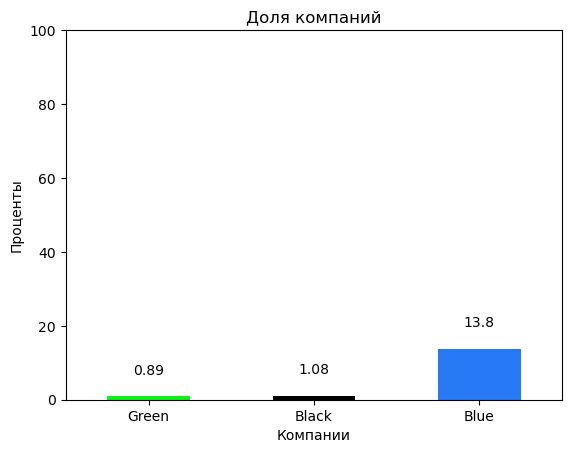

In [8]:
# Количество зарегистрированных аккаунтов в компаниях Green, Black, Blue соответственно.

# Поскольку бОльшая доля(13.8%) зарегистрированных пользователей принадлежит компании Blue,
# то можно сделать вывод о том, что
# компаниям Black и Green стоит обратить внимание на конверсию зарегистрированных пользователей. 
# Видимо, существуют определенные барьеры для пользователей при регистрации
# или услуги/товары этих компаний не решают боль/потребность пользователей.


share_reg = pd.DataFrame({'share_reg_account': [round(df['has_Green_id'].sum()/df['HID'].count()*100,2),  round(df['has_Black_id'].sum()/df['HID'].count()*100,2),  round(df['has_Blue_id'].sum()/df['HID'].count()*100,2)],
                         'count_reg_account': [df['has_Green_id'].sum(),  df['has_Black_id'].sum(),  df['has_Blue_id'].sum()]}, index = ['Green', 'Black', 'Blue'])

x_labels = ['Green', 'Black', 'Blue']

ax = share_reg['share_reg_account'].plot(kind="bar", color = ['#0cf214', '0', '#2779f5'])
ax.set_title("Доля компаний")
ax.set_xlabel("Компании")
ax.set_ylabel("Проценты")
ax.set_xticklabels(x_labels)
ax.set(ylim=(0, 100))
plt.xticks(rotation= 0)


rects = ax.patches
labels = list(share_reg['share_reg_account'].values)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

print(share_reg)
plt.show()

       android_count  apple_count  web_count     total
Red          32133.0      10874.0    67108.0  110115.0
Green          546.0        616.0      198.0    1360.0
Black         1077.0       1782.0     1461.0    4320.0
Blue          8047.0       4646.0    10640.0   23333.0
total        41803.0      17918.0    79407.0  139128.0


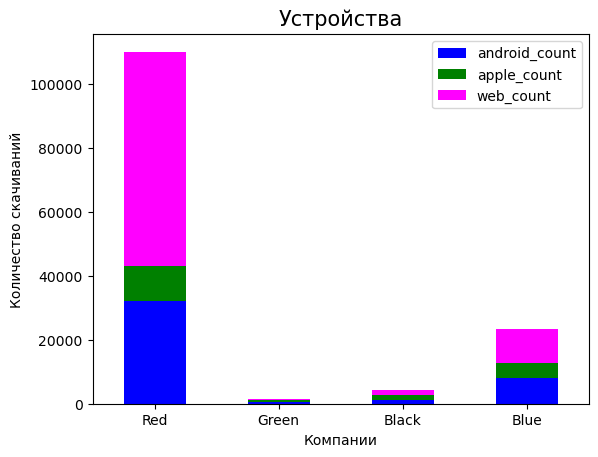

In [9]:
# Количество установленных приложений на платформах android, apple и ПК в компаниях Red, Green, Black, Blue соответственно.

# Наименьшее количество установленных приложений у компаний Green и Black, следовательно, данным компаниям следует обратить
# внимание на то, почему пользователи не устанавливают их приложения. (какие барьеры)

# Сравнивая разные платформы (android, apple, ПК), очевидно, что пользователи 'Red' и 'Blue' чаще всего скачивают приложения
# на ПК и android, поэтому компаниям стоит сделать упор на улучшение приложения для apple, 
# возможно его функционал/интерфейс гораздо слабее приложений на других платформах.

# Компания Red является лидером среди остальных по установке приложения компании, причем на всех платформах.Другим компаниям
# стоит проанализровать стратегию 'Red' и возможно изменить свою.

devices1 = pd.DataFrame({
                        'android_count': [df['Red_android'].sum(),  df['Green_android'].sum(), df['Black_android'].sum(), df['Blue_android'].sum(), df['Red_android'].sum()+df['Green_android'].sum()+df['Black_android'].sum()+df['Blue_android'].sum()],
                        'apple_count': [df['Red_apple'].sum(),  df['Green_apple'].sum(), df['Black_apple'].sum(), df['Blue_apple'].sum(), df['Red_apple'].sum()+df['Green_apple'].sum()+df['Black_apple'].sum()+df['Blue_apple'].sum()],
                        'web_count': [df['Red_web'].sum(), df['Green_web'].sum(), df['Black_web'].sum(), df['Blue_web'].sum(), df['Red_web'].sum()+df['Green_web'].sum()+df['Black_web'].sum()+df['Blue_web'].sum()],
                        'total': [df['Red_android'].sum()+df['Red_apple'].sum()+df['Red_web'].sum(), df['Green_android'].sum()+df['Green_apple'].sum()+df['Green_web'].sum(), df['Black_android'].sum()+df['Black_apple'].sum()+df['Black_web'].sum(), df['Blue_android'].sum()+df['Blue_apple'].sum()+df['Blue_web'].sum(), 139128]},
                        index = ['Red', 'Green', 'Black', 'Blue', 'total'])

devices = pd.DataFrame({'company': ['Red', 'Green', 'Black', 'Blue'],
                        'android_count': [df['Red_android'].sum(),  df['Green_android'].sum(), df['Black_android'].sum(), df['Blue_android'].sum()],
                        'apple_count': [df['Red_apple'].sum(),  df['Green_apple'].sum(), df['Black_apple'].sum(), df['Blue_apple'].sum()],
                        'web_count': [df['Red_web'].sum(),  df['Green_web'].sum(), df['Black_web'].sum(), df['Blue_web'].sum()]})

devices.set_index('company').plot(kind='bar', stacked= True , color=['blue', 'green', 'magenta'])

plt.title('Устройства', fontsize= 15)

plt.xlabel('Компании')
plt.ylabel('Количество скачиваний')
plt.xticks(rotation= 0)

print(devices1)
plt.show()